In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor

# 1. Load your data
data = pd.read_csv("Reading Data.csv")  # Replace with your actual file path

data['test_variable'] = data[['M' , 'P']].sum(axis=1)
data['target_combined'] = data[['SENSOR 1', 'SENSOR 2', 'SENSOR 3', 'SENSOR 4', 'SENSOR 6', 'SENSOR 8']].sum(axis=1)

# Separate features (X) and target variable (y)
X = data.drop("test_variable", axis=1)  # Replace "target_column" with the actual column name
y = data["target_combined"]

# 3. Split the data into training and testing sets (optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create a Poisson regression model
model = PoissonRegressor()

# 5. Train the model on the training data
model.fit(X_train, y_train)

# 6. Make predictions on the test data (if you split the data)
predictions = model.predict(X_test)

# 7. Evaluate model performance
score = model.score(X_test, y_test)
print("Model score:", score)

# 8. Use the model to make predictions on new data
new_data = X_test  # Example new data
new_predictions = model.predict(new_data)
print("New predictions:", new_predictions)


Model score: 0.20444050564438498
New predictions: [1.31005275 3.13871737 0.88284692]


In [15]:
X_test


,M,P,SENSOR 1,SENSOR 2,SENSOR 3,SENSOR 4,SENSOR 5,SENSOR 6,SENSOR 7,SENSOR 8,target_combined
5,92,8,0.15208,0.227370,0.35479,0.13890,0.50591,0.22563,0.77035,0.22878,1.327550
0,100,0,2.79492,0.697810,3.28598,1.32697,0.28424,1.45367,0.58745,1.68367,11.243020
9,70,30,0.06262,0.098064,0.06139,0.11710,2.11649,0.07130,1.59176,0.10966,0.520134


In [16]:
y_test


5     1.327550
0    11.243020
9     0.520134
Name: target_combined, dtype: float64

In [24]:
# Importing libraries 

import numpy as np 
import pandas as pd 
import scipy as stats 

# calculateMahalanobis function to calculate 
# the Mahalanobis distance 
def calculateMahalanobis(y=None, data=None, cov=None): 

	y_mu = y - np.mean(data) 
	if not cov: 
		cov = np.cov(data.values.T) 
	inv_covmat = np.linalg.inv(cov) 
	left = np.dot(y_mu, inv_covmat) 
	mahal = np.dot(left, y_mu.T) 
	return mahal.diagonal() 

# data 
data_1 = pd.read_csv("Reading Data.csv")

# Creating dataset 
df = pd.DataFrame(data,columns=['SENSOR 1', 'SENSOR 2', 
								'SENSOR 3','SENSOR 4', 
								'SENSOR 6','SENSOR 8']) 

# Creating a new column in the dataframe that holds 
# the Mahalanobis distance for each row 
df['calculateMahalanobis'] = calculateMahalanobis(y=df, data=df[[ 
'SENSOR 1', 'SENSOR 2', 'SENSOR 3','SENSOR 4', 'SENSOR 6','SENSOR 8']]) 

# Display the dataframe 
print(df) 



    SENSOR 1  SENSOR 2  SENSOR 3  SENSOR 4  SENSOR 6  SENSOR 8  \
0   2.794920  0.697810   3.28598   1.32697   1.45367   1.68367   
1   0.101830  0.273910   0.39414   0.16561   0.23676   0.22437   
2   0.133430  0.167670   0.53161   0.16116   0.24654   0.24632   
3   0.148940  0.211170   0.50989   0.12105   0.22343   0.21249   
4   0.116080  0.240250   0.61854   0.18683   0.27455   0.27851   
5   0.152080  0.227370   0.35479   0.13890   0.22563   0.22878   
6   0.125830  0.261160   0.15486   0.15486   0.25379   0.23382   
7   0.076589  0.013710   0.51905   0.00638   0.21229   0.10782   
8   0.050620  0.053050   0.12270   0.11408   0.01303   0.05253   
9   0.062620  0.098064   0.06139   0.11710   0.07130   0.10966   
10  0.038190  0.092150   0.24748   0.01603   0.00597   0.04735   

    calculateMahalanobis  
0              37.104153  
1              13.728662  
2              43.315762  
3              29.771174  
4              37.421591  
5              34.527002  
6              24.

In [25]:
df


,SENSOR 1,SENSOR 2,SENSOR 3,SENSOR 4,SENSOR 6,SENSOR 8,calculateMahalanobis
0,2.794920,0.697810,3.28598,1.32697,1.45367,1.68367,37.104153
1,0.101830,0.273910,0.39414,0.16561,0.23676,0.22437,13.728662
2,0.133430,0.167670,0.53161,0.16116,0.24654,0.24632,43.315762
3,0.148940,0.211170,0.50989,0.12105,0.22343,0.21249,29.771174
4,0.116080,0.240250,0.61854,0.18683,0.27455,0.27851,37.421591
5,0.152080,0.227370,0.35479,0.13890,0.22563,0.22878,34.527002
6,0.125830,0.261160,0.15486,0.15486,0.25379,0.23382,24.984198
7,0.076589,0.013710,0.51905,0.00638,0.21229,0.10782,39.501438
8,0.050620,0.053050,0.12270,0.11408,0.01303,0.05253,20.437186
9,0.062620,0.098064,0.06139,0.11710,0.07130,0.10966,35.350060


In [27]:
df.to_csv("my_data.csv")


In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import EmpiricalCovariance, MinCovDet
from sklearn.pipeline import Pipeline  # Add this import statement
from sklearn.model_selection import GridSearchCV  # Add this import statement

data = pd.read_csv("Reading Data.csv")  # Replace with your actual file path

data['test_variable'] = data[['M' , 'P']].sum(axis=1)
data['target_combined'] = data[['SENSOR 1', 'SENSOR 2', 'SENSOR 3', 'SENSOR 4', 'SENSOR 6', 'SENSOR 8']].sum(axis=1)

# Separate features (X) and target variable (y)
X = data.drop("test_variable", axis=1)  # Replace "target_column" with the actual column name
y = data["target_combined"]

steps = [
        ("preprocessing", StandardScaler()),
        ("pca", PCA()),]
        
pipe = Pipeline(steps)
searchPCA = GridSearchCV(pipe, { "pca__n_components": [1, 2,3]}, n_jobs = 3)
searchPCA.fit(X)
DF = searchPCA.transform(X)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        DF[y == i, 0], DF[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.title("PCA of IRIS dataset")
    xx, yy = np.meshgrid(
            np.linspace(plt.xlim()[0], plt.xlim()[1], 100),
            np.linspace(plt.ylim()[0], plt.ylim()[1], 100),)
    zz = np.c_[xx.ravel(), yy.ravel()]
    
    robust_cov = MinCovDet().fit(DF[y == i,0:2])
    
    mahal_robust_cov = robust_cov.mahalanobis(zz)
    
    mahal_robust_cov = mahal_robust_cov.reshape(xx.shape)

    plt.contour(
            xx, yy, np.sqrt(mahal_robust_cov), cmap=plt.cm.YlOrBr_r, linestyles="dashed", levels=[3])



IndexError: index 1 is out of bounds for axis 1 with size 1

<Figure size 640x480 with 0 Axes>

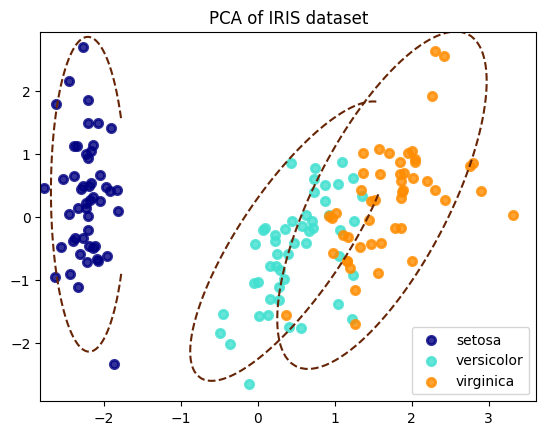

In [9]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import EmpiricalCovariance, MinCovDet
from sklearn.pipeline import Pipeline  # Add this import statement
from sklearn.model_selection import GridSearchCV  # Add this import statement



iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

steps = [
        ("preprocessing", StandardScaler()),
        ("pca", PCA()),]
        
pipe = Pipeline(steps)
searchPCA = GridSearchCV(pipe, { "pca__n_components": [1, 2,3]}, n_jobs = 3)
searchPCA.fit(X)
DF = searchPCA.transform(X)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        DF[y == i, 0], DF[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.title("PCA of IRIS dataset")
    xx, yy = np.meshgrid(
            np.linspace(plt.xlim()[0], plt.xlim()[1], 100),
            np.linspace(plt.ylim()[0], plt.ylim()[1], 100),)
    zz = np.c_[xx.ravel(), yy.ravel()]
    
    robust_cov = MinCovDet().fit(DF[y == i,0:2])
    
    mahal_robust_cov = robust_cov.mahalanobis(zz)
    
    mahal_robust_cov = mahal_robust_cov.reshape(xx.shape)

    plt.contour(
            xx, yy, np.sqrt(mahal_robust_cov), cmap=plt.cm.YlOrBr_r, linestyles="dashed", levels=[3])



ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 2 is required by MinCovDet.

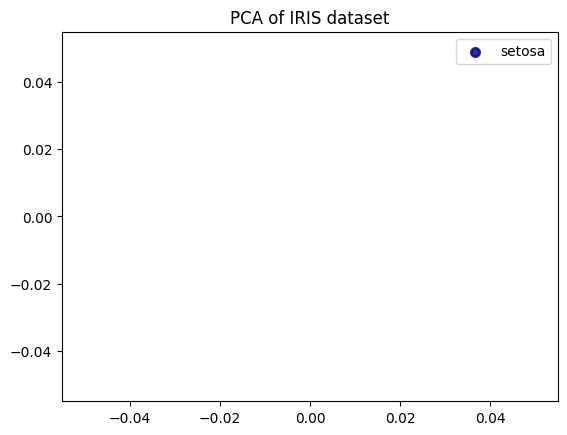

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import EmpiricalCovariance, MinCovDet
from sklearn.pipeline import Pipeline  # Add this import statement
from sklearn.model_selection import GridSearchCV  # Add this import statement

data = pd.read_csv("Reading Data.csv")  # Replace with your actual file path

data['test_variable'] = data[['M' , 'P']].sum(axis=1)
data['target_combined'] = data[['SENSOR 1', 'SENSOR 2', 'SENSOR 3', 'SENSOR 4', 'SENSOR 6', 'SENSOR 8']].sum(axis=1)

# Separate features (X) and target variable (y)
X = data.drop("test_variable", axis=1)  # Replace "target_column" with the actual column name
y = data["target_combined"]

steps = [
        ("preprocessing", StandardScaler()),
        ("pca", PCA()),]
        
pipe = Pipeline(steps)
searchPCA = GridSearchCV(pipe, { "pca__n_components": [1, 2,3]}, n_jobs = 3)
searchPCA.fit(X)
DF = searchPCA.transform(X)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(DF[y == i, 0], np.zeros_like(DF[y == i, 0]), color=color, alpha=0.8, lw=lw, label=target_name)  # Use zeros for the second dimension

    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.title("PCA of IRIS dataset")
    xx, yy = np.meshgrid(
            np.linspace(plt.xlim()[0], plt.xlim()[1], 100),
            np.linspace(plt.ylim()[0], plt.ylim()[1], 100),)
    zz = np.c_[xx.ravel(), yy.ravel()]
    
    robust_cov = MinCovDet().fit(DF[y == i,0:2])
    
    mahal_robust_cov = robust_cov.mahalanobis(zz)
    
    mahal_robust_cov = mahal_robust_cov.reshape(xx.shape)

    plt.contour(
            xx, yy, np.sqrt(mahal_robust_cov), cmap=plt.cm.YlOrBr_r, linestyles="dashed", levels=[3])

